# Which Awardee is awarded the contract with the highest dollar amount in 2022 in Department of Defense?

In [18]:
#importing required libraries
import pandas as pd
import numpy as np
from io import StringIO
import requests
from datetime import datetime
import matplotlib.pyplot as plt

In [19]:
%%time
url_22 = requests.get('https://umbc.box.com/shared/static/tdkmuj86qm2uxhvjlfkav2i3pnx9fkoa.csv').text
# Create StringIO objects for CSV data
csv_22 = StringIO(url_22)
# Read data frames
df_22 = pd.read_csv(csv_22, encoding='latin1', low_memory=False)
# Print data frames with timestamps
print(df_22)

                                NoticeId  \
0       97ec6ab3d5d4454192a8828827de6f2f   
1       c15a7148317b44eeac210a7b64068765   
2       e52f4a998e1d4ec4bc8f507f3ddaacd4   
3       031b2345baee4b89a8782e116b09d3dd   
4       bf103afa7b4b455bb1541eb450e38128   
...                                  ...   
341587  9f5c5ffbcf544822897d81adf4d48a31   
341588  2e2ab5512120475dba81379f508400d9   
341589  bb24f68bc7e542c7bf1301c44fd0b1ff   
341590  21c6761b82df4147b72d893cd89872b2   
341591  4aabc1ad68094f32b4990846e2995dc2   

                                                    Title  \
0                             Whooster Web-Based Software   
1       Beckman Coulter Reagents and Supplies for Gove...   
2       USACE-SPK -DBB - Folsom Main, Left Wing and Ri...   
3       A Solicitation of the National Institutes of H...   
4           8(a) WebEOC IL5 Cloud Services and IT Support   
...                                                   ...   
341587  Lease Vehicles for Marine Corps Base

In [20]:
df_22.head()

,NoticeId,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,...,SecondaryContactPhone,SecondaryContactFax,OrganizationType,State,City,ZipCode,CountryCode,AdditionalInfoLink,Link,Description
0,97ec6ab3d5d4454192a8828827de6f2f,Whooster Web-Based Software,HQ003422P0171,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 23:09:21.289-04,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/97ec6ab3d5d4454192a8828827...,The Whooster Web Based Software contract is a ...
1,c15a7148317b44eeac210a7b64068765,Beckman Coulter Reagents and Supplies for Gove...,W81K0222Q0162,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W40M RHCO PACIFIC,W81K02,2022-09-30 23:01:45.502-04,...,NaN,NaN,OFFICE,HI,FORT SHAFTER,96858-5098,USA,NaN,https://sam.gov/opp/c15a7148317b44eeac210a7b64...,The Medical Readiness Contracting Office  Pac...
2,e52f4a998e1d4ec4bc8f507f3ddaacd4,"USACE-SPK -DBB - Folsom Main, Left Wing and Ri...",W9123822R0055,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,US ARMY ENGINEER DISTRICT SACRAMENT,W91238,2022-09-30 22:44:29.969-04,...,NaN,NaN,OFFICE,CA,SACRAMENTO,95814-2922,USA,NaN,https://sam.gov/opp/e52f4a998e1d4ec4bc8f507f3d...,The Folsom Dam Raise Project is a Flood Risk M...
3,031b2345baee4b89a8782e116b09d3dd,A Solicitation of the National Institutes of H...,PHS-2023-1,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",75.0,NATIONAL INSTITUTES OF HEALTH,7529,NATIONAL INSTITUTES OF HEALTH NIAID,75N930,2022-09-30 22:35:59.258-04,...,NaN,NaN,OFFICE,MD,BETHESDA,20892,USA,NaN,https://sam.gov/opp/031b2345baee4b89a8782e116b...,The National Institutes of Health (NIH) and th...
4,bf103afa7b4b455bb1541eb450e38128,8(a) WebEOC IL5 Cloud Services and IT Support,HQ003422C0130,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 22:12:14.082-04,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/bf103afa7b4b455bb1541eb450...,Direct Award of an 8(a) contract for WebEOC IL...


# Data Cleaning

In [21]:
#dropping columns
new_df = df_22.drop(['SetASideCode', 'SetASide', 'SecondaryContactTitle', 'SecondaryContactFullname', 'Description','PrimaryContactFullname','PrimaryContactEmail','PrimaryContactPhone' ,'PrimaryContactFax',
                   'SecondaryContactEmail', 'SecondaryContactPhone', 'SecondaryContactFax', 'AdditionalInfoLink', 'Link','PrimaryContactTitle'],axis=1)

In [22]:
new_df.shape #getting number of rows and columns of the data

(341592, 32)

In [23]:
def date_conversion(date_series):
    try:
        date_series = pd.to_datetime(date_series, errors='coerce')
        date_series = date_series.where(date_series.between('1678-01-01', '2262-04-11'), np.nan)
        date_series = date_series.interpolate(method='linear')  # Specify method as 'linear'
        return date_series
    except Exception as e:
        print("An error occurred:", e)
        return pd.Series([])  # Return an empty Series if an error occurs

In [24]:
#Convert 'Award$' column to string type
new_df['Award$'] = new_df['Award$'].astype(str)
    
    # Extract numeric portion using regular expression and convert to float
new_df['Award$'] = new_df['Award$'].str.extract(r'(\d+\.\d+)').astype(float)

In [25]:
# Calculate min
min_value = new_df['Award$'].min()

new_df['Award$'] = new_df['Award$'].fillna(value = min_value)

print(min_value)

0.0


In [26]:
#filling null values for the columns
new_df[['Title','Department/Ind.Agency','CGAC','Sol','Sub-Tier','FPDS Code','AAC Code','NaicsCode','ClassificationCode','PopStreetAddress','PopCity','PopState','PopZip','PopCountry','Office']] = new_df[['Title','Department/Ind.Agency','CGAC','Sol#','Sub-Tier','FPDS Code','AAC Code',        'NaicsCode','ClassificationCode','PopStreetAddress','PopCity','PopState','PopZip','PopCountry','Office']].fillna('OTHER')
new_df[['OrganizationType','State','City','CountryCode','ZipCode','AwardNumber','Awardee']] = new_df[['OrganizationType','State','City','CountryCode','ZipCode','AwardNumber','Awardee']] .fillna('UNKNOWN')

# Analysis and Visulization

The awardee with the highest dollar amount in 2022 in the Department of Defense is: AMERISOURCEBERGEN DRUG CORP PA 19428-1800 USA with an amount of: $28865568773.13


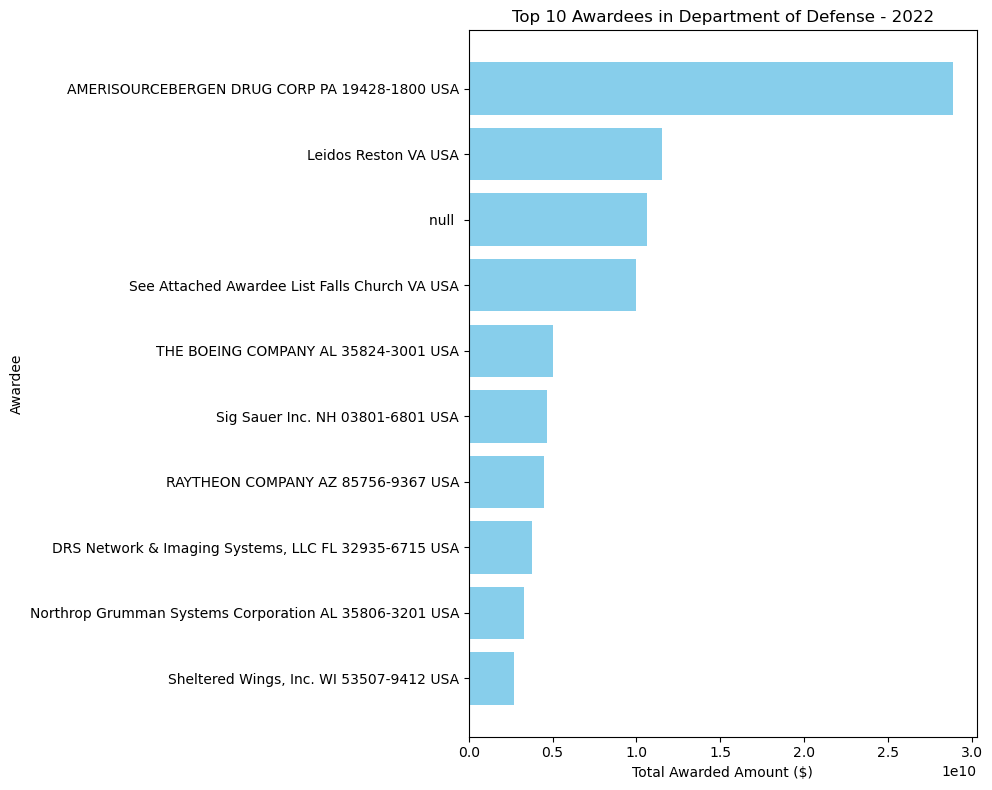

In [27]:


# Convert 'AwardDate' to datetime type with a specific format
new_df['AwardDate'] = pd.to_datetime(new_df['AwardDate'], errors='coerce', format='%Y-%m-%d')

# Filter data for the Department of Defense and year 2022
defense_2022 = new_df[(new_df['Department/Ind.Agency'] == 'DEPT OF DEFENSE') & (new_df['AwardDate'].dt.year == 2022)]

# Find the awardee with the highest dollar amount in 2022
highest_awardee = defense_2022.loc[defense_2022['Award$'].idxmax()]['Awardee']
highest_amount = defense_2022['Award$'].max()
print(f"The awardee with the highest dollar amount in 2022 in the Department of Defense is: {highest_awardee} with an amount of: ${highest_amount}")

# Calculate total awarded amounts for each awardee
awardee_total_amounts = defense_2022.groupby('Awardee')['Award$'].sum().nlargest(10)  # Top 10 awardees

# Visualization of top 10 awardees
plt.figure(figsize=(10, 8))
plt.barh(awardee_total_amounts.index, awardee_total_amounts.values, color='skyblue')
plt.xlabel('Total Awarded Amount ($)')
plt.ylabel('Awardee')
plt.title('Top 10 Awardees in Department of Defense - 2022')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest amount at the top
plt.tight_layout()
plt.show()


The awardee with the highest dollar amount in 2022 in the Department of Defense is: AMERISOURCEBERGEN DRUG CORP PA 19428-1800 USA with an amount of: $28865568773.13